<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/MNIST-Binary-Classification/blob/main/Binary_Classification_of_MNIST_(0_vs_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, f1_score, recall_score, precision_score

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [4]:
print(type(x_train))

<class 'numpy.ndarray'>


In [5]:
mask = (y_train==0) | (y_train==1)
X_train_filtered = x_train[mask]
y_train_filtered = y_train[mask]
print(X_train_filtered.shape)
print(y_train_filtered.shape)

(12665, 28, 28)
(12665,)


In [6]:
test_mask = (y_test==0) | (y_test==1)
X_test_filtered = x_test[test_mask]
y_test_filtered = y_test[test_mask]
print(X_test_filtered.shape)
print(y_test_filtered.shape)

(2115, 28, 28)
(2115,)


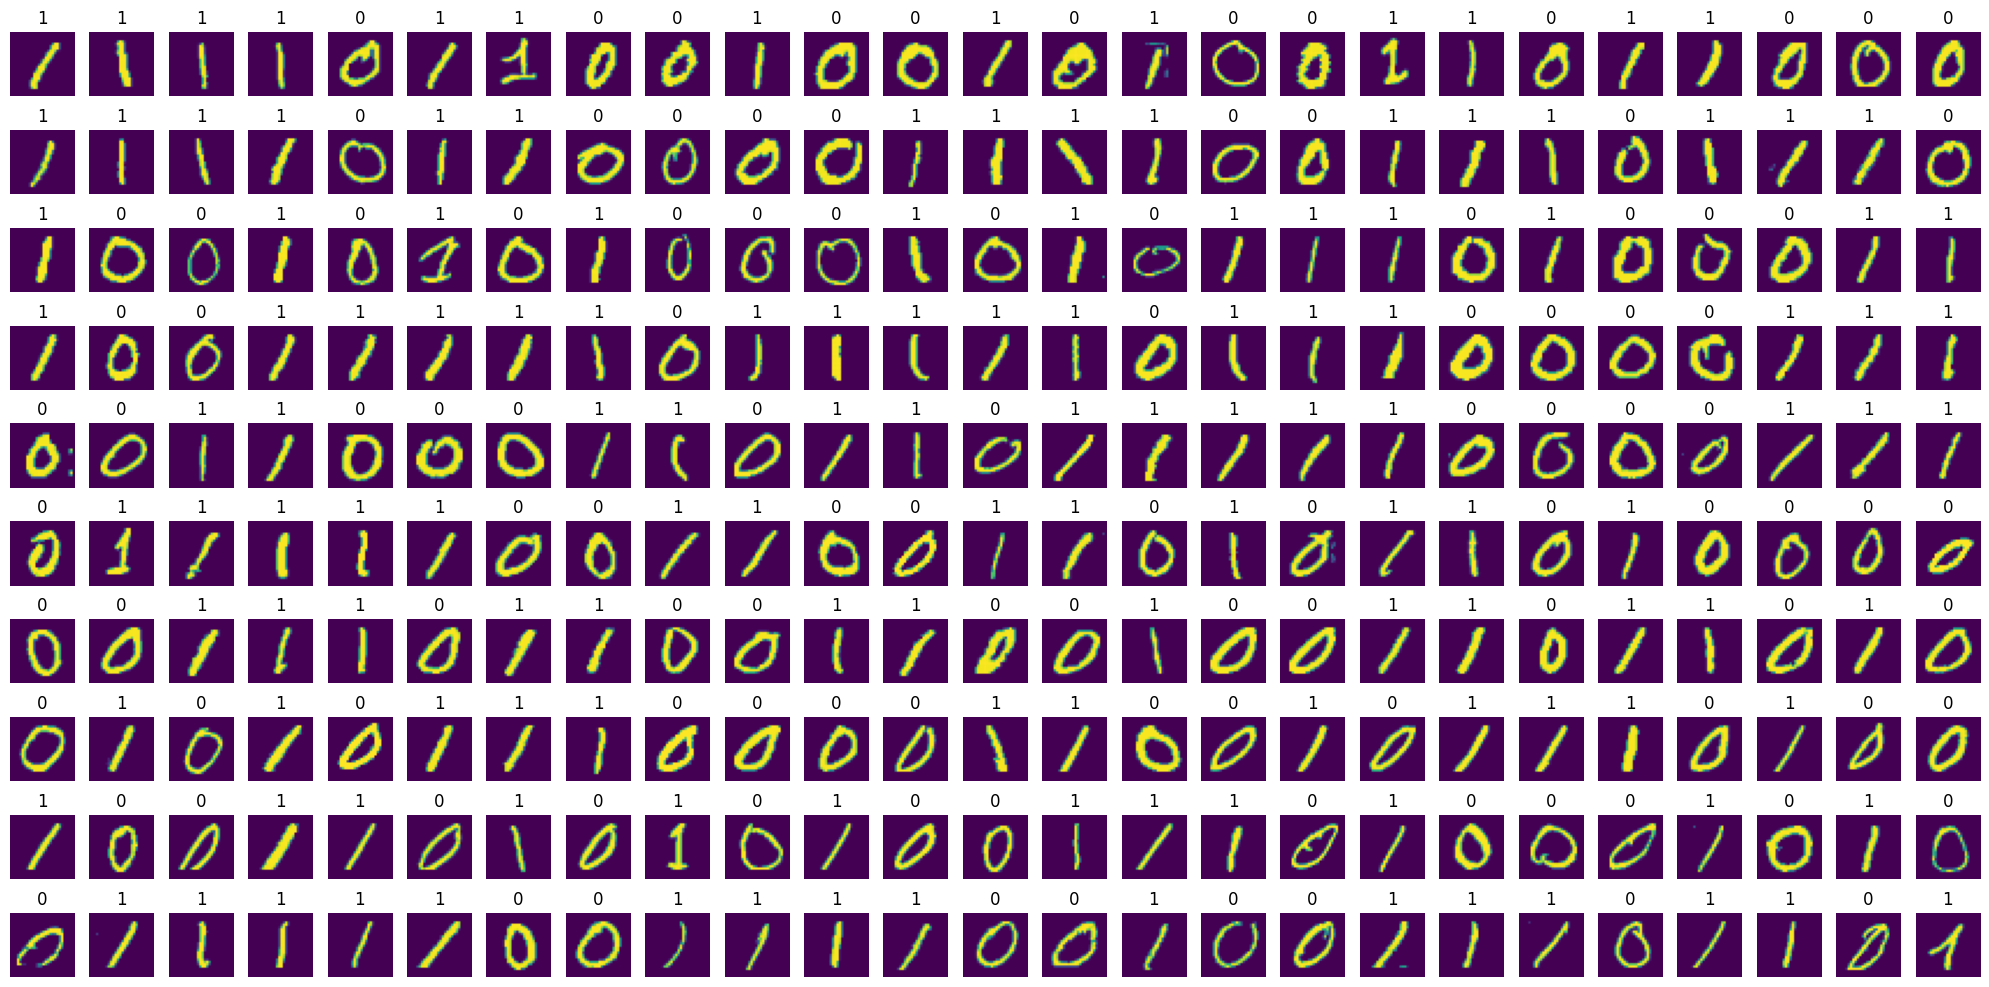

In [76]:
plt.figure(figsize=(20,10))

for i in range(1,251):
  plt.subplot(10,25,i)
  plt.imshow(X_train_filtered[i])
  plt.title(y_train_filtered[i])
  plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
X_test_filtered.shape

(2115, 28, 28)

In [16]:
model = Sequential([
    tf.keras.Input(shape = (X_test_filtered.shape[1], X_test_filtered.shape[2])),
    Flatten(),
    Dense(64, activation='relu', name="L1"),
    Dense(32, activation='relu', name="L2"),
    Dense(1, activation='sigmoid', name="L3")
], name='my_model')

In [17]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
)

In [19]:
model.fit(X_train_filtered, y_train_filtered.reshape(-1,1), epochs=100)

Epoch 1/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0901e-08
Epoch 2/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1474e-09
Epoch 3/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4346e-08
Epoch 4/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8876e-09
Epoch 5/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8254e-09
Epoch 6/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3220e-09
Epoch 7/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7579e-09
Epoch 8/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.0363e-09
Epoch 9/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5105e-10
Epoch 10/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4114e-09
Epoch 11/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.1796e-09
Epoch 12/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6727e-10
Epoch 13/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4375e-10
Epoch 14/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

In [20]:
y_train_pred = model.predict(X_train_filtered)
print(y_train_pred)

396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


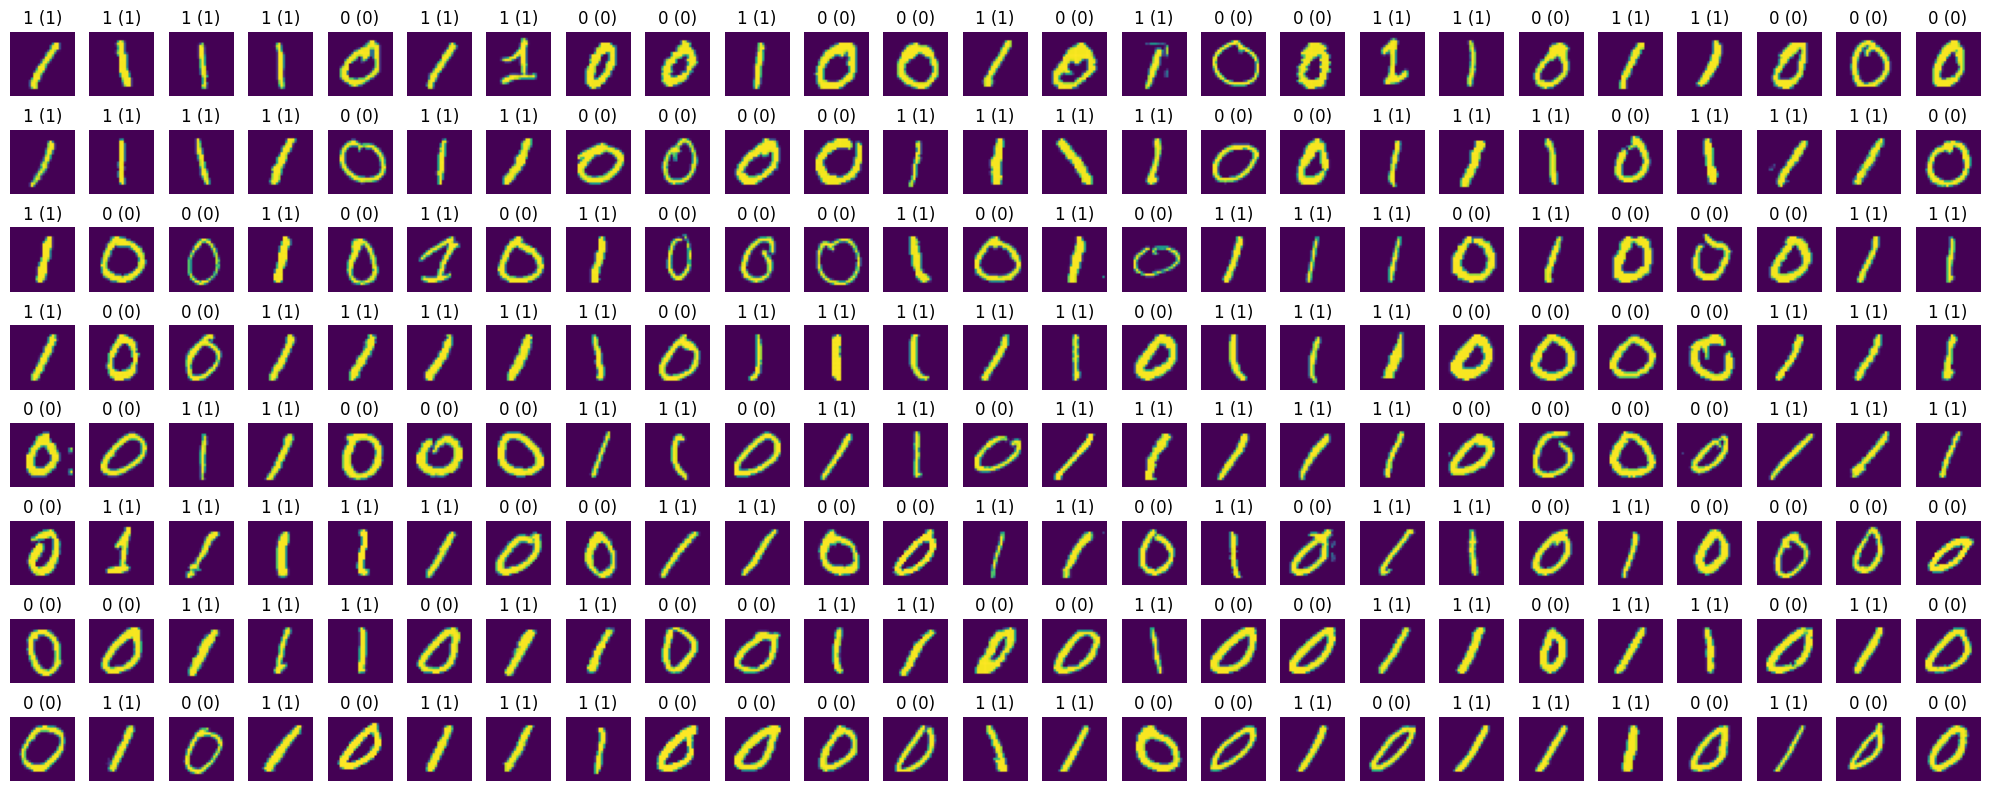

In [81]:
plt.figure(figsize=(20,10))

for i in range(1,201):
  plt.subplot(10,25,i)
  plt.imshow(X_train_filtered[i])
  plt.title(f'{y_train_pred[i].item():.0f} ({y_train_filtered[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
print(f1_score(y_train_filtered, y_train_pred.round()))
print(recall_score(y_train_filtered, y_train_pred.round()))
print(precision_score(y_train_filtered, y_train_pred.round()))
print(confusion_matrix(y_train_filtered, y_train_pred.round()))

1.0
1.0
1.0
[[5923    0]
 [   0 6742]]


In [31]:
y_test_pred = model.predict(X_test_filtered)
print(y_test_pred)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [58]:
y_test_pred[1].item()

0.0

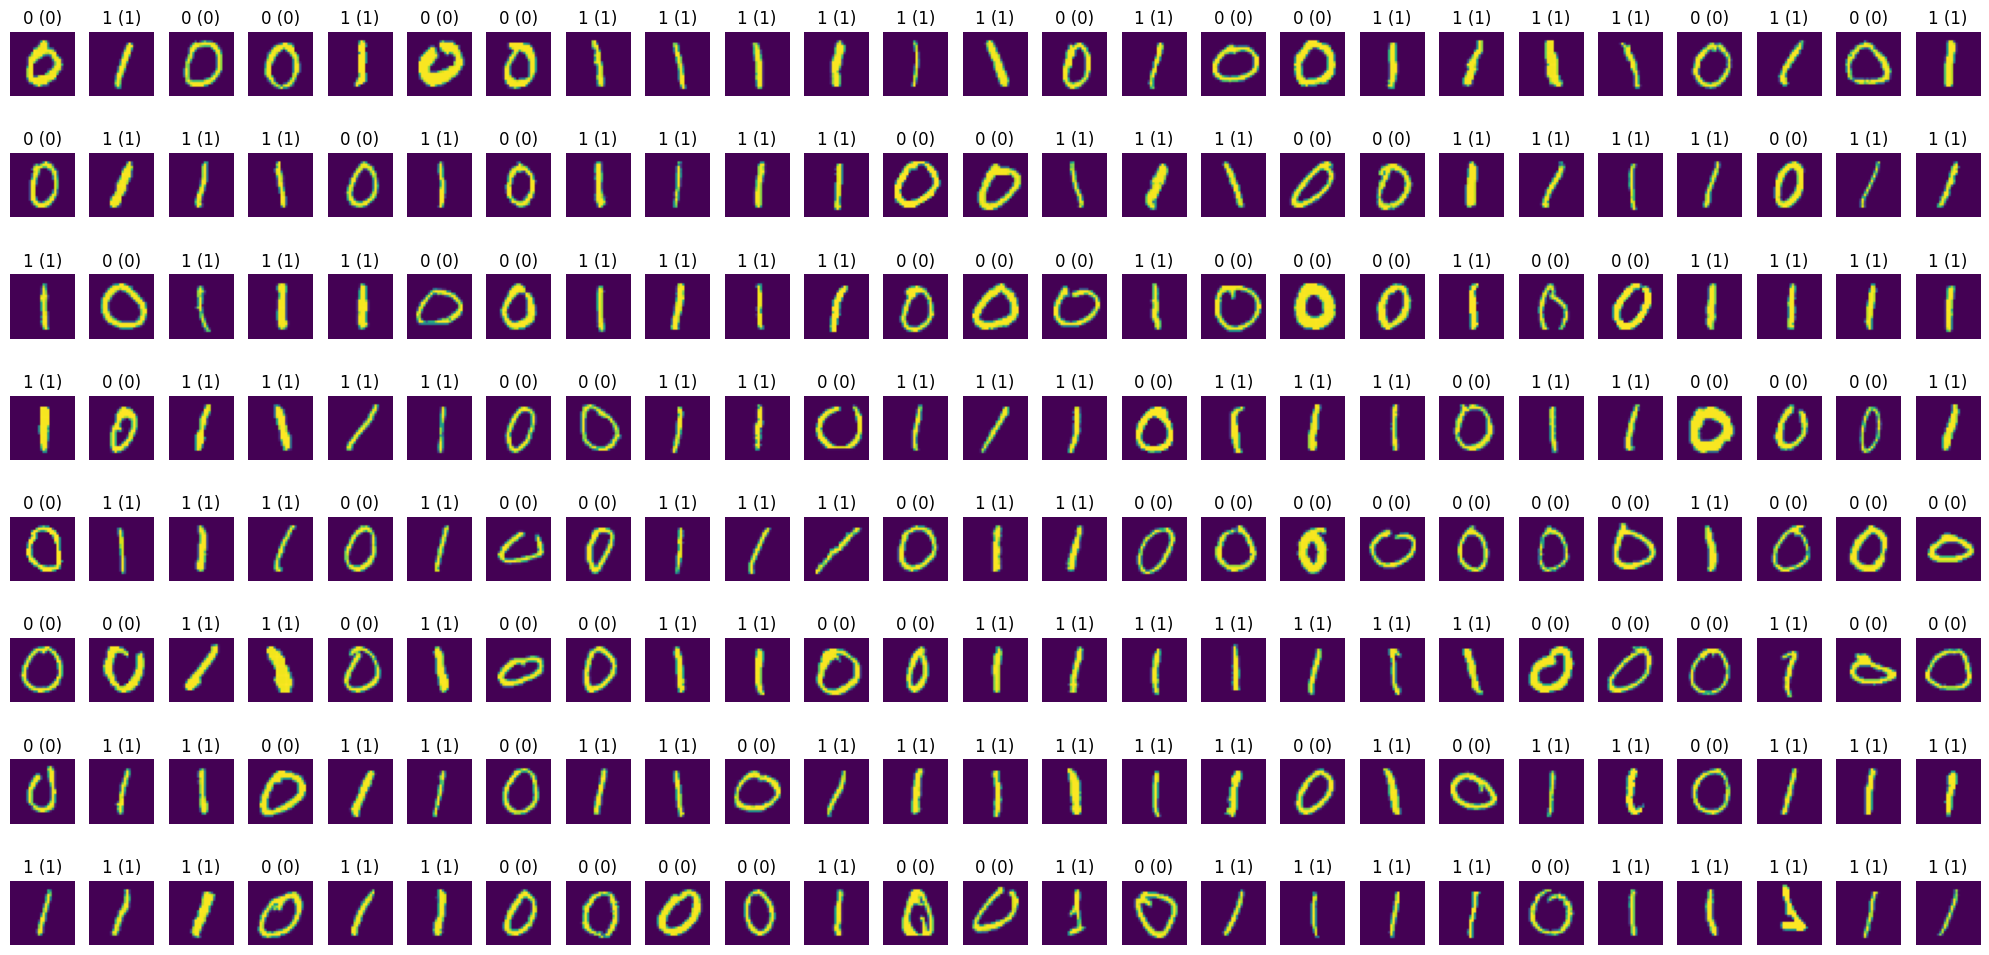

In [79]:
plt.figure(figsize=(20,10))
for i in range(1,201):
  plt.subplot(8,25,i)
  plt.imshow(X_test_filtered[i])
  plt.title(f'{y_test_pred[i].item():.0f} ({y_test_filtered[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [34]:
print(f1_score(y_test_filtered, y_test_pred.round()))
print(recall_score(y_test_filtered, y_test_pred.round()))
print(precision_score(y_test_filtered, y_test_pred.round()))
print(confusion_matrix(y_test_filtered, y_test_pred.round()))

0.9995596653456627
1.0
0.9991197183098591
[[ 979    1]
 [   0 1135]]


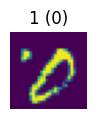

In [80]:
for i in range(1,len(y_test_pred)):
  if y_test_filtered[i] != y_test_pred[i].round():
    plt.figure(figsize=(1,1))
    plt.imshow(X_test_filtered[i])
    plt.title(f'{y_test_pred[i].item():.0f} ({y_test_filtered[i]})')
    plt.axis('off')
    plt.show()